# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Density and Real Estate__<br><br>
This notebook:
- Merge the density and real estate dataset.
- Remove Null values 
- Show Msno matrix

In [1]:
import pandas as pd
import matplotlib
import missingno as msno

%matplotlib inline

# 1. Density and Real Estate 
## 1.1 Read CSV Files
Load Density and Real Estate files

In [2]:
density_df = pd.read_csv('Density.csv', index_col=False)
density_df.head()

,FIPS,county,state,2016,2017,2018,2019,2020
0,1001,Autauga County,AL,92,93,93,93,98
1,1003,Baldwin County,AL,130,133,137,140,145
2,1005,Barbour County,AL,29,28,28,27,28
3,1007,Bibb County,AL,36,36,35,35,35
4,1009,Blount County,AL,89,89,89,89,91


In [3]:
density_df.shape

(3140, 8)

In [4]:
density_df = density_df[['FIPS', 'county', 'state', '2020']]
density_df.head(10)

,FIPS,county,state,2020
0,1001,Autauga County,AL,98
1,1003,Baldwin County,AL,145
2,1005,Barbour County,AL,28
3,1007,Bibb County,AL,35
4,1009,Blount County,AL,91
5,1011,Bullock County,AL,16
6,1013,Butler County,AL,24
7,1015,Calhoun County,AL,192
8,1017,Chambers County,AL,58
9,1019,Cherokee County,AL,45


In [5]:
re_df = pd.read_csv('Real_Estate.csv', index_col=False)
re_df.head()

C:\Users\Pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,FIPS,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,month,year,county,state
0,2016-07-01,2013,"aleutians east, ak",485000.0,NaN,NaN,3.0,NaN,NaN,612.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7,2016,Aleutians East,AK
1,2016-08-01,2013,"aleutians east, ak",485000.0,NaN,NaN,4.0,NaN,NaN,644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,2016,Aleutians East,AK
2,2016-09-01,2013,"aleutians east, ak",485000.0,NaN,NaN,4.0,NaN,NaN,665.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9,2016,Aleutians East,AK
3,2016-10-01,2013,"aleutians east, ak",199500.0,NaN,NaN,4.0,NaN,NaN,449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10,2016,Aleutians East,AK
4,2016-11-01,2013,"aleutians east, ak",485000.0,NaN,NaN,4.0,NaN,NaN,735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11,2016,Aleutians East,AK


In [6]:
re_df.shape

(207513, 44)

## 1.2 Merged the Dataframe

In [7]:
df = re_df.merge(density_df, how='inner', left_on='FIPS', right_on='FIPS').drop(['county_name', 'state_x', 'county_x'], axis=1)
df.head()

,date,FIPS,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,...,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,month,year,county_y,state_y,2020
0,2016-07-01,2013,485000.0,NaN,NaN,3.0,NaN,NaN,612.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7,2016,Aleutians East Borough,AK,0
1,2016-08-01,2013,485000.0,NaN,NaN,4.0,NaN,NaN,644.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8,2016,Aleutians East Borough,AK,0
2,2016-09-01,2013,485000.0,NaN,NaN,4.0,NaN,NaN,665.0,NaN,...,NaN,NaN,NaN,NaN,NaN,9,2016,Aleutians East Borough,AK,0
3,2016-10-01,2013,199500.0,NaN,NaN,4.0,NaN,NaN,449.0,NaN,...,NaN,NaN,NaN,NaN,NaN,10,2016,Aleutians East Borough,AK,0
4,2016-11-01,2013,485000.0,NaN,NaN,4.0,NaN,NaN,735.0,NaN,...,NaN,NaN,NaN,NaN,NaN,11,2016,Aleutians East Borough,AK,0


In [8]:
# Reorder the columns
df.columns

Index(['date', 'FIPS', 'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm',
       'new_listing_count_yy', 'price_increased_count',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
       'total_listing_count

In [9]:
# Assign new order
column = ['FIPS', 'date', 'month', 'year', 'county_y', 'state_y','2020',
          'median_listing_price', 'median_listing_price_mm','median_listing_price_yy', 
          'active_listing_count', 'active_listing_count_mm', 'active_listing_count_yy',
          'median_days_on_market', 'median_days_on_market_mm', 'median_days_on_market_yy', 
          'new_listing_count', 'new_listing_count_mm','new_listing_count_yy', 
          'price_increased_count','price_increased_count_mm', 'price_increased_count_yy',
          'price_reduced_count', 'price_reduced_count_mm', 'price_reduced_count_yy', 
          'pending_listing_count', 'pending_listing_count_mm', 'pending_listing_count_yy',
          'median_listing_price_per_square_foot', 'median_listing_price_per_square_foot_mm',
          'median_listing_price_per_square_foot_yy', 'median_square_feet',
          'median_square_feet_mm', 'median_square_feet_yy', 'average_listing_price', 
          'average_listing_price_mm', 'average_listing_price_yy', 'total_listing_count',
          'total_listing_count_mm', 'total_listing_count_yy', 'pending_ratio',
          'pending_ratio_mm', 'pending_ratio_yy', 'quality_flag'] 
df = df[column]
df = df.rename(columns = {'county_y': 'county', 'state_y': 'state', '2020':'density'})
df.sample(3).T


,58237,180635,28690
FIPS,18163,48433,13097
date,2019-04-01,2017-05-01,2019-01-01
month,4,5,1
year,2019,2017,2019
county,Vanderburgh County,Stonewall County,Douglas County
state,IN,TX,GA
density,771,1,720
median_listing_price,133664,29900,234700
median_listing_price_mm,0.0187,NaN,-0.0013
median_listing_price_yy,-0.0449,NaN,0.1024


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,207398.0,3.033657e+04,15147.245609,1001.0000,18171.0000,29155.0000,45063.0000,5.604500e+04
month,207398.0,6.687273e+00,3.486172,1.0000,4.0000,7.0000,10.0000,1.200000e+01
year,207398.0,2.018778e+03,1.635775,2016.0000,2017.0000,2019.0000,2020.0000,2.022000e+03
density,207398.0,2.779607e+02,1864.876218,0.0000,17.0000,45.0000,120.0000,7.421100e+04
median_listing_price,207368.0,2.305248e+05,210609.359470,2382.0000,133950.0000,186609.0000,279000.0000,1.680000e+07
median_listing_price_mm,170148.0,2.199160e-02,0.921066,-0.9947,-0.0252,0.0000,0.0342,3.134416e+02
median_listing_price_yy,169341.0,1.322187e-01,1.609543,-0.9947,-0.0253,0.0622,0.1737,3.998025e+02
active_listing_count,207368.0,3.496528e+02,969.359650,0.0000,31.0000,95.0000,289.0000,2.335200e+04
active_listing_count_mm,170076.0,-7.248702e-03,0.220484,-1.0000,-0.0833,-0.0140,0.0443,4.800000e+01
active_listing_count_yy,169220.0,-8.556392e-02,0.985142,-1.0000,-0.3497,-0.1466,0.0163,9.600000e+01


In [11]:
print("This display the first five states in the value counts per state: ")
print(df['state'].value_counts().head())
print("There are ", len(df['state'].value_counts()), "states which includes District of Columbia.")

This display the first five states in the value counts per state: 
TX    16531
GA    10588
VA     8718
KY     8035
MO     7704
Name: state, dtype: int64
There are  51 states which includes District of Columbia.


 ## 1.3 Cleanup Missing Data

<AxesSubplot:>

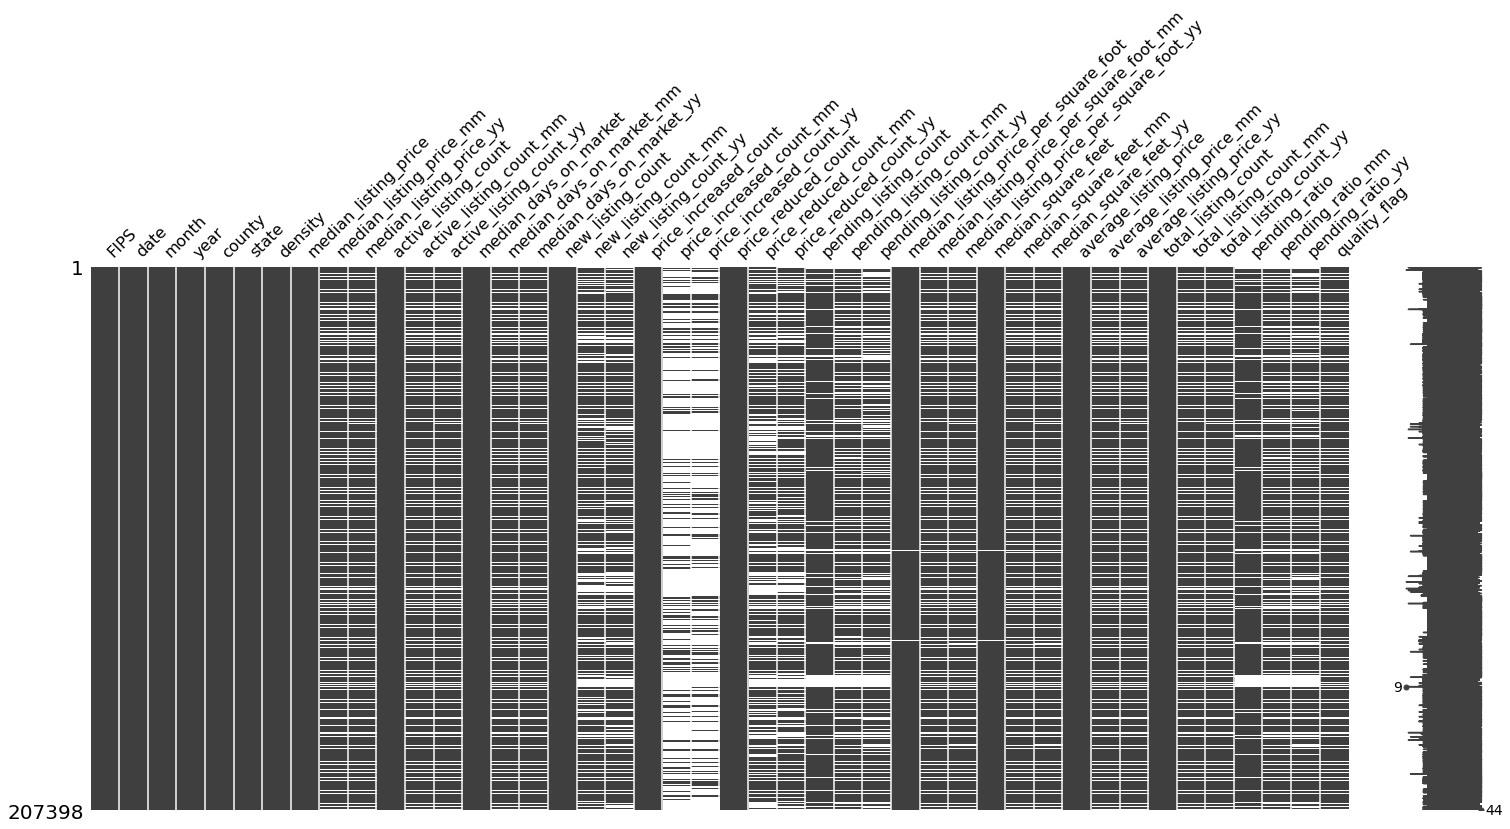

In [12]:
msno.matrix(df)

- The pending list price is not always available. If a pending definition is available for that geography. This is a snapshot measure of how many pending listings can be expected on any given day of the specified month.
- Since the pending list price is not always available and so will the ration of the pending list price. The ratio of the pending listing count to the active listing count within the specified geography during the specified month.<br>
- M/M will not be included because it is the percentage change in the price increase count from the previous month.<br>
- Y/Y will not be included too because it is the percentage change in the price increase count from the same month in the previous year.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207398 entries, 0 to 207397
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FIPS                                     207398 non-null  int64  
 1   date                                     207398 non-null  object 
 2   month                                    207398 non-null  int64  
 3   year                                     207398 non-null  int64  
 4   county                                   207398 non-null  object 
 5   state                                    207398 non-null  object 
 6   density                                  207398 non-null  int64  
 7   median_listing_price                     207368 non-null  float64
 8   median_listing_price_mm                  170148 non-null  float64
 9   median_listing_price_yy                  169341 non-null  float64
 10  active_listing_count            

In [14]:
#These are the null values that should be deleted
df_null = df[df['median_square_feet'].isnull()]
# drop the null value for average_listing_price
df.drop(index=df_null.index, 
           axis=0, 
           inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206924 entries, 0 to 207397
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FIPS                                     206924 non-null  int64  
 1   date                                     206924 non-null  object 
 2   month                                    206924 non-null  int64  
 3   year                                     206924 non-null  int64  
 4   county                                   206924 non-null  object 
 5   state                                    206924 non-null  object 
 6   density                                  206924 non-null  int64  
 7   median_listing_price                     206924 non-null  float64
 8   median_listing_price_mm                  169923 non-null  float64
 9   median_listing_price_yy                  169155 non-null  float64
 10  active_listing_count            

In [15]:
df1 = df[['FIPS', 'year', 'month', 'county', 'state', 'date', 'density', 'active_listing_count', 
          'average_listing_price', 'average_listing_price_mm', 'average_listing_price_yy',  
          'median_listing_price', 'median_listing_price_mm', 'median_listing_price_yy',
          'median_listing_price_per_square_foot', 'median_square_feet',  
          'total_listing_count']]

In [16]:
df1.head()

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count
0,2013,2016,7,Aleutians East Borough,AK,2016-07-01,0,3.0,394833.0,NaN,NaN,485000.0,NaN,NaN,93.0,4100.0,3.0
1,2013,2016,8,Aleutians East Borough,AK,2016-08-01,0,4.0,308350.0,NaN,NaN,485000.0,NaN,NaN,93.0,4100.0,4.0
2,2013,2016,9,Aleutians East Borough,AK,2016-09-01,0,4.0,307350.0,NaN,NaN,485000.0,NaN,NaN,93.0,4100.0,4.0
3,2013,2016,10,Aleutians East Borough,AK,2016-10-01,0,4.0,281880.0,NaN,NaN,199500.0,NaN,NaN,93.0,2469.0,4.0
4,2013,2016,11,Aleutians East Borough,AK,2016-11-01,0,4.0,336125.0,NaN,NaN,485000.0,NaN,NaN,119.0,4100.0,4.0


<AxesSubplot:>

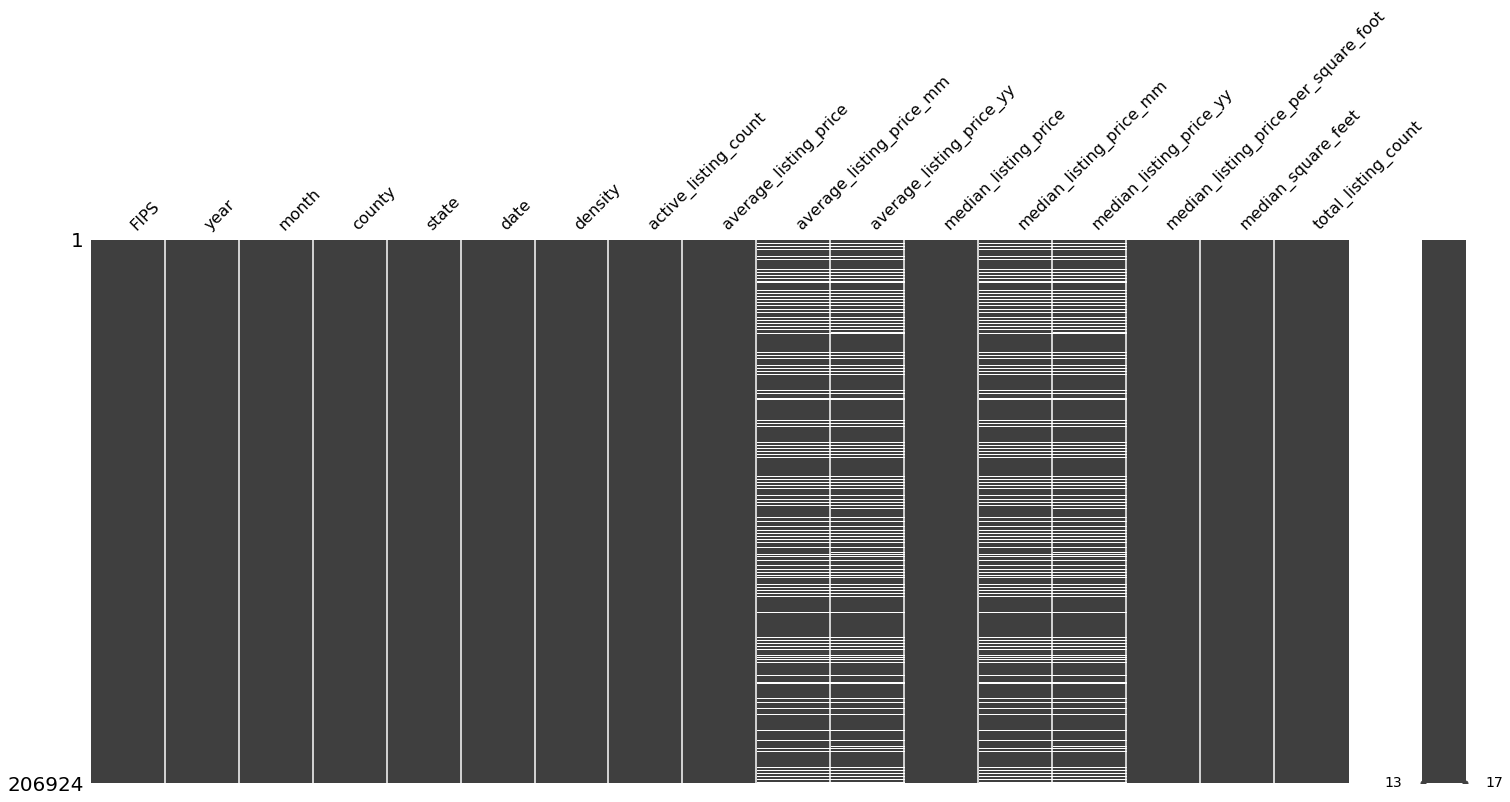

In [17]:
msno.matrix(df1)

The missing data are those that have ratio or change from one period to another. Otherwise, data has no null or nan values

## 1.4 Save to CSV

In [18]:
df1.to_csv('RE_Density.csv', index=False)